# Неустойчивые орбиты вокруг точки L1
в круговой ограниченной задаче трех тел

### Условие задачи


**Дано:**
- движение невесомого тела в системе из двух массивных тел, вращающихся относительно общего центра масс, описывается системой уравнений:

$\begin{cases}
\ddot{x} - 2\dot{y} = \frac{\partial{U}}{\partial{x}} \\
\ddot{y} + 2\dot{x} = \frac{\partial{U}}{\partial{y}} \\
\ddot{z} = \frac{\partial{U}}{\partial{z}} \\
U = \frac{1}{2} (x^2 + y^2) + \frac{\mu_1}{r_1} + \frac{\mu_2}{r_2} \\
r^2_1 = (x + \mu_2)^2 + y^2 + z^2 \\
r^2_2 = (x - \mu_1)^2 + y^2 + z^2
\end{cases}$

- константы модели для системы Солнце-Земля:
    - $\mu_2 = 3.001348389698916e-06$

- методы Рунге-Кутты для интегрирования систем ОДУ первого порядка, рассмотренные на семинарах
- алгоритм вычисления начальной скорости для неустойчивой орбиты вокруг L1, рассмотренный на семинаре
- библиотека математических алгоритмов [Tracker Component Library](https://github.com/USNavalResearchLaboratory/TrackerComponentLibrary/blob/master/Mathematical_Functions/Differential_Equations/RungeKStep.m)
- модули `numba`, `numpy`, `matplotlib`


**Требуется:**
1. Реализовать обобщенный метод Рунге-Кутты на основе таблицы Бутчера для интегрирования систем ОДУ первого порядка

    - функция для расчета одного шага размера $h$
    - функция для расчета $n$ шагов размера $h$ (1)
    - подготовить таблицу Бутчера для интегратора 5 порядка (см. Tracker Component Library)


2. Реализовать алгоритм вычисления начальной скорости для неустойчивой орбиты вокруг L1:

    - модификация функции (1) для досрочной остановки интегрирования при условии пересечения одной из плоскостей
    - функция для расчета начальной скорости $vy_0$ на основе метода бисекции для орбиты, заданной начальным положением $(x_0, 0, z_0)$ и условием ортогональности вектора скорости и плоскости $XOZ$ в начальный момент времени
    
        - $d_p = 1.4$ млн. км.
        - $x_{left} = x_{L1} - d_p$ - координата левой плоскости, заданной уравнением $x = x_{left}$
        - $x_{right} = x_{L1} + d_p$ - координата правой плоскости, заданной уравнением $x = x_{right}$


3. Реализовать алгоритм вычисления начальных скоростей орбит, начальные состояния которых заданы на решетке:
    - $(x_0, z_0) \in [x_{min}, x_{max}] \times [z_{min}, z_{max}]$

        - $d_g = 1.0$ млн. км.
        - $x_{min} = x_{L1} - d_g / 2$
        - $x_{max} = x_{L1} + d_g / 2$
        - $z_{min} = 0.0$
        - $z_{max} = d_g$

    - количество узлов на решетке $N \times N$


4. Использовать `@njit`, `@cfunc`, `prange` из модуля `numba` для компиляции всех функций и распараллеливания функции расчета на решетке


5. Вычислить начальные скорости и константы Якоби на заданных решетках
    - $J = 2 U - v^2$ - формула для вычисления константы Якоби
    - $h = 0.01721420632103996$ - шаг по времени `t`, равен 1 суткам в берзармерных единицах
    - $x_{L1}$ - координата точки L1 (см. материалы семинара)
    - $R = 149.6$ млн. км. - среднее расстояние Солнце-Земля
    - $[-0.1, 0.1]$ - начальный отрезок для уточнения скоростей методом бисекции


6. Измерить время вычислений


7. Сохранить результаты вычислений в файлах `*.npy` (функцией `np.save`)


8. Построить цветовые карты рассчитанных величин:

    - засечки по осям должны соответствовать координатам $x, z$, где $x$ отсчитывается относительно $x_{L1}$
    - единицы измерений по осям - километры
    - оси должны быть подписаны
    - должен присутствовать `colorbar`
    - должен присутствовать заголовок рисунка


9. Задокументировать все реализованные функции


**Материалы:**
- [Методы Рунге-Кутты](https://ru.wikipedia.org/wiki/Метод_Рунге_—_Кутты)
- [Динамика Солнечной Системы](https://disk.yandex.ru/i/HfJaUW2Sm62td)
- [Tracker Component Library](https://github.com/USNavalResearchLaboratory/TrackerComponentLibrary/blob/master/Mathematical_Functions/Differential_Equations/RungeKStep.m)
- [Mapping of initial conditions for libration point orbits](https://www.dropbox.com/s/wafy1jaylclngbv/Aksenov_ASR.pdf?dl=0)


**Рекомендации:**
- использовать IDE **Pycharm** (полная версия для студентов и преподавателей)


**Бонусная задача:**
- выполнить расчеты для $d_g = 2$ млн. км и решетки размером $640 \times 640$ и построить цветовые карты согласно пункту 8
- для этой решетки часть орбит не может быть расчитана рассмотренным методом, поэтому необходимо корректно обработать такие случаи


**Правила оценивания:**

- оценка за корректно выполненные расчеты на решетке размером $(N, N)$:
```
      i  =  1   2    3    4
    N(i) = 40  80  160  320
    g(i) =  1  16   33   50
```
    
- штрафы $p(j)$, баллов:
    - нет цветовых карт - 20
    - не сохранены файлы с результатами вычислений - 20
    - нет документации функций - 20
    - не измерено время вычислений - 10
    - менее значимые недоработки - 10
    
    
- бонусы $b(k)$, баллов
    - выполнена бонусная задача - 20
    

- итоговая оценка за задание = $\sum_{i}g(i) - \sum_{j}{p(j)} + \sum_{k}{b(k)}$

# Пункт 1 (+проверка)

In [18]:
import numpy as np
from rk import rk_Butcher_nsteps, rk_Butcher_step, lv_ode
import matplotlib.pyplot as plt
#from tqdm import trange
from time import time
from numba import njit, cfunc, prange
# пояснения по rk_examples

In [19]:
t0 = 0.
t1 = 10.
n = 100
h = (t1 - t0) / n
a, b, c, d = 1.0, 1.0, 1.0, 1.0
mc = np.array([a, b, c, d])

xhat = c/d
yhat = a/b

s0 = np.array([xhat, yhat]) + np.array([1., 1.])

In [20]:
c_v = np.array([0, 1/2, 1/2, 1])
b_v = np.array([1/6, 1/3, 1/3, 1/6])

A_m = np.array([[0, 0, 0, 0],
              [1./2., 0, 0, 0],
              [0, 1./2., 0, 0],
              [0, 0, 1., 0]])

butcher_tab = (A_m, b_v, c_v)

In [21]:
A_m

array([[0. , 0. , 0. , 0. ],
       [0.5, 0. , 0. , 0. ],
       [0. , 0.5, 0. , 0. ],
       [0. , 0. , 1. , 0. ]])

In [22]:
arr = rk_Butcher_nsteps(lv_ode, # правая часть СОДУ Лотки-Вольтерры
                 t0,     # начальный момент времени
                 s0,     # начальный вектор состояния
                 h,      # шаг по времени
                 butcher_tab,
                 mc,     # параметры (константы) модели
                 n)      # количество шагов

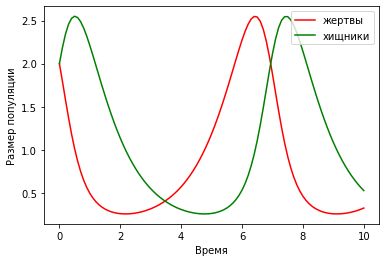

In [23]:
plt.plot(arr[:, 0], arr[:, 1], '-r', label='жертвы')
plt.plot(arr[:, 0], arr[:, 2], '-g', label='хищники')
plt.ylabel('Размер популяции')
plt.xlabel('Время')
plt.legend()

Обобщенный алгоритм работает - результат совпадает с прямым вводом алгоритма 4-го порядка

In [24]:
A = np.array([[0,         0,          0,          0,          0,              0,    0],
              [1/5,       0,          0,          0,          0,              0,    0],
              [3/40,      9/40,       0,          0,          0,              0,    0],
              [44/45,     -56/15,     32/9,       0,          0,              0,    0],
              [19372/6561,-25360/2187,64448/6561, -212/729,   0,              0,    0],
              [9017/3168, -355/33,    46732/5247, 49/176,     -5103/18656,    0,    0],
              [35/384,    0,          500/1113,   125/192,    -2187/6784,     11/84,0]])
c = np.array([0, 1/5, 3/10, 4/5, 8/9, 1, 1])
b = np.array([35/384, 0, 500/1113, 125/192, -2187/6784, 11/84, 0])

butcher_tab = (A, b, c)

# Пункт 2

#### (Предварительно найдём xL1)

In [25]:
mu2 = 3.001348389698916e-06
mu1 = 1 - mu2
R = 149600000

In [26]:
from rk import f_crtbp_ode

def g(x, mc):
    s = np.zeros(6)
    s[0] = x
    return f_crtbp_ode(0., s, mc)[3]

In [27]:
from scipy.optimize import root

x0 = 3/4 * mu1
mc = np.array([mu2])

xL1 = root(g, x0, mc, tol=1e-16).x[0]
xL1

0.9900289479871318

#### (Перейдём к определению стороны пересечения)

In [28]:
from rk import rk_Butcher_nsteps_planes

@njit
def get_plane(vy, f, s, h, b_t, mc, n, pl):
    """
    вспомогательная функция определения в какую сторону улетит объект при моделировании в данных условиях
    parameters:
        vy: скорость аппарата по оси oY
        f: функция правой части системы
        s: начальное состояние системы (из явного условия системы Коши)
        h: размер временного шага алгоритма
        b_t: кортеж таблицы Бутчера, в который входит матрица A и вектора b, c
        mc: массив констант модели
        n: кол-во шагов
        pl: границы рассчитываемого коридора полета
    returns:
        -1 если объект в итоге оказался отклонен влево и 1 если вправо
    """
    s0 = s.copy()
    s0[4] = vy
    arr = rk_Butcher_nsteps_planes(f, 0.,s0,h,b_t,mc,n, pl)
    x = arr[-1,1]
    xmean = np.mean(pl)
    return -1 if x < xmean else 1

In [29]:
from scipy.optimize import bisect

@njit
def my_bisect(f, v_min, v_max, args, xtol):
    """
    функция расчёта точки разрыва функции методов бисекции
    parameters:
        f: функция
        v_min, v_max: ограничение области рассчета
        args: параметры функции
        xtol: точность
    """
    a = v_min
    b = v_max
    while True:
        m = (a + b)/2
        if np.abs(b-a) < xtol:
            return m
        elif f(a, *args) == f(m, *args):
            a = m
        else:
            b = m


def get_v0(f, h, b_t, mc, x0, y0, z0, v_reg, pl):
    """
    функция расчёта начальной скорости объекта вблизи xL1 для наиболее долгого времени пребывания возле неё
    методом бисекции
    parameters:
        f: функция правой части системы
        h: размер временного шага алгоритма
        b_t: кортеж таблицы Бутчера, в который входит матрица A и вектора b, c
        mc: массив констант модели
        x0, y0, z0: начальные координаты
        v_reg: область поиска начальной скорости v_0*
    returns:
        v_star: начальная скорость объекта, при которой достигается наиболее продолжительное пребывание на орбите вокруг xL1
    """
    s = np.zeros(6)
    s[0] = x0
    s[1] = y0
    s[2] = z0
    v_min, v_max = v_reg
    #v_star = my_bisect(get_plane, v_min, v_max, args=(f, s, h, b_t, mc, 100000, pl), xtol=1e-16)
    v_star = bisect(get_plane, v_min, v_max, args=(f, s, h, b_t, mc, 100000, pl), xtol=1e-16)
    return v_star

# Пункт 3-4

In [40]:
def grid_calculus(calculator, x_c, d_g, N, f, h, b_t, mc, v_reg, d_p):
    """
    функция расчёта значения по решетке начальных состояний
    parameters:
        calculator: расчитывающая в узле решётки функция
        x_c: центр решётки по x
        d_g: сторона решетки
        N: число узлов по каждой стороне решётки
        f, h, b_t, mc, v_reg: параметры расчитывающей в узле решётки функции (см. значение параметра calculator)
        d_p: радиус рассчитываемого пространства (тоже пункт выше)
    returns:
        res: матрица значений функции в узлах решетки
    """
    x_reg = np.linspace(x_c - d_g / 2, x_c + d_g / 2, N)
    z_reg = np.linspace(0., d_g, N)
    pl = np.array([x_c - d_p, x_c + d_p])
    res = np.empty((N,N))
    for i in range(N):
        for j in range(N):
            res[i,j] = calculator(f, h, b_t, mc, x_reg[i], 0, z_reg[j], v_reg, pl)
    return res

In [41]:
v_reg = np.array([-0.1, 0.1])
d_p = 1400000. / R
d_g = 1000000. / R
h = 0.01721420632103996

# Пункт 5-7 (запуски)

In [ ]:
N = 40

start = time()
np.save('grid_calc_40.npy', grid_calculus(get_v0, xL1, d_g, N, f_crtbp_ode, h, butcher_tab, mc, v_reg, d_p))
print('calc_time is', round(time() - start, 4), 's')

calc_time is 237.6737 s


In [ ]:
N = 80

start = time()
np.save('grid_calc_80.npy', grid_calculus(get_v0, xL1, d_g, N, f_crtbp_ode, h, butcher_tab, mc, v_reg, d_p))
print('calc_time is', round(time() - start, 4), 's')

calc_time is 930.5248 s


In [ ]:
N = 160

start = time()
np.save('grid_calc_80.npy', grid_calculus(get_v0, xL1, d_g, N, f_crtbp_ode, h, butcher_tab, mc, v_reg, d_p))
print('calc_time is', round(time() - start, 4), 's')

calc_time is 3596.1549 s


In [ ]:
N = 320

start = time()
np.save('grid_calc_320.npy', grid_calculus(get_v0, xL1, d_g, N, f_crtbp_ode, h, butcher_tab, mc, v_reg, d_p))
print('calc_time is', round(time() - start, 4), 's')

100%|██████████| 320/320 [4:01:53<00:00, 45.35s/it]

calc_time is 14513.2302 s


# Пункт 8 (графики)

In [12]:
def grid_graphicus(x_c, d_g, N):
    """
    процедура расчёта графиков нач. скоростей и констант Якоби
    parameters:
        x_c: центр решётки по x
        d_g: сторона решетки
        N: число узлов по каждой стороне решётки
    """
    x_reg = np.linspace(x_c - d_g / 2, x_c + d_g / 2, N)
    z_reg = np.linspace(0., d_g, N)
    data = np.load(f'grid_calc_{N}.npy')
    fig = plt.figure(figsize=(7,7))
    borders = (np.array([x_reg[0] - x_c, x_reg[-1] - x_c, z_reg[0], z_reg[-1]])) * R
    plt.imshow(data.T, extent=borders)
    plt.title('начальные скорости')
    plt.xlabel('координата x')
    plt.ylabel('координата z')
    plt.colorbar()
    plt.show()
    
    data_Jacob = np.empty((N,N))
    for i in range(N):
        for j in range(N):
            r1 = np.sqrt((x_reg[i] + mu2) ** 2 + z_reg[j] ** 2)
            r2 = np.sqrt((x_reg[i] - mu1) ** 2 + z_reg[j] ** 2)
            U = x_reg[i] ** 2 / 2 + mu1 / r1 + mu2 / r2
            data_Jacob[i,j] = 2 * U - data[i,j] ** 2
    
    fig = plt.figure(figsize=(7,7))
    plt.imshow(data_Jacob.T, extent=borders)
    plt.title('константы Якоби')
    plt.xlabel('координата x')
    plt.ylabel('координата z')
    plt.colorbar()
    plt.show()

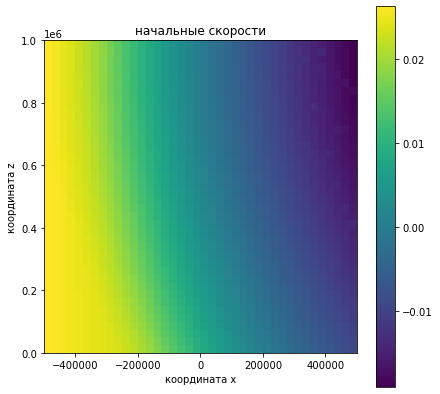

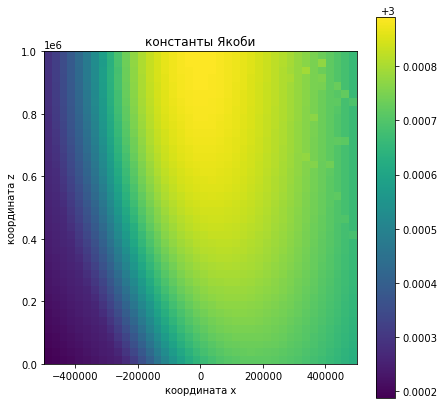

In [13]:
grid_graphicus(xL1, d_g, 40)

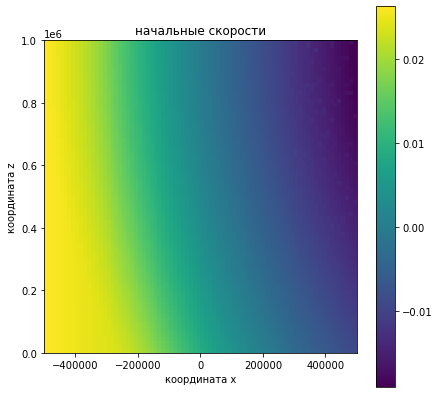

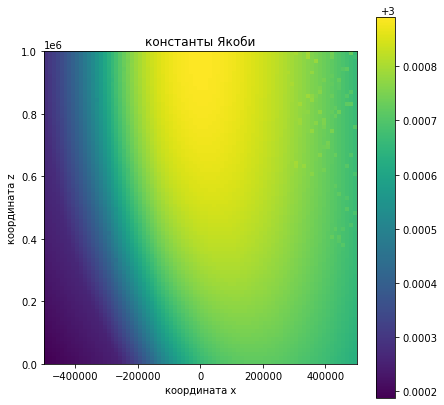

In [14]:
grid_graphicus(xL1, d_g, 80)

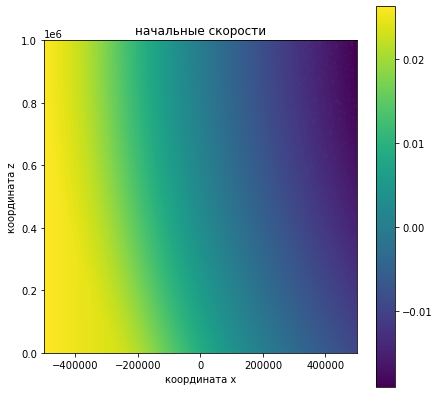

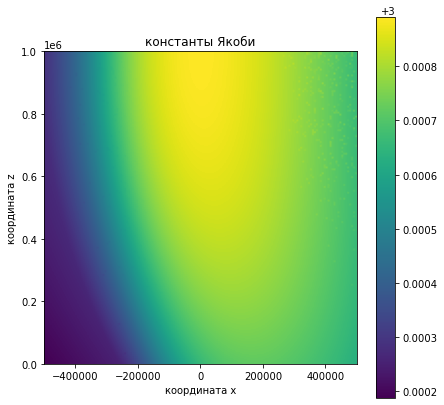

In [15]:
grid_graphicus(xL1, d_g, 160)

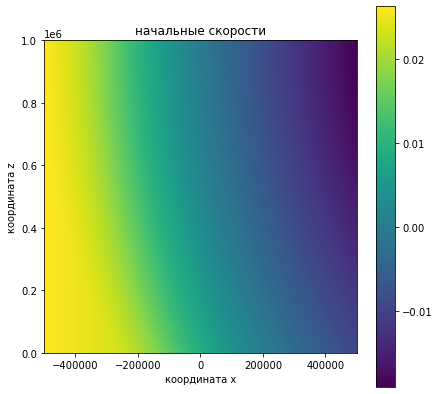

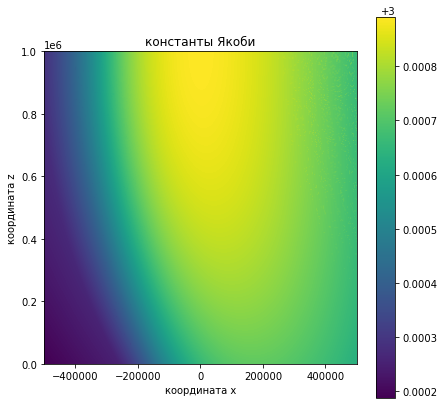

In [16]:
grid_graphicus(xL1, d_g, 320)